In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN


In [3]:
import hdbscan

ModuleNotFoundError: No module named 'hdbscan'

In [4]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/r-maSj5Yegvw2sJraT15FA/ODCAF-v1-0.csv'
df = pd.read_csv(url, encoding="ISO-8859-1")

In [5]:
df = df[df.ODCAF_Facility_Type == 'museum']
df = df[['Latitude', 'Longitude']]
df = df[df.Latitude != '..']
df[['Latitude', 'Longitude']] = df[['Latitude', 'Longitude']].astype(float)


In [6]:
# Scale coordinates for clustering
coords_scaled = df.copy()
coords_scaled["Latitude"] = 2 * coords_scaled["Latitude"]


In [9]:
# DBSCAN clustering
dbscan = DBSCAN(eps=1.0, min_samples=3, metric='euclidean')
df['DBSCAN_Cluster'] = dbscan.fit_predict(coords_scaled)


In [10]:
# HDBSCAN clustering
hdb = hdbscan.HDBSCAN(min_cluster_size=3, metric='euclidean')
df['HDBSCAN_Cluster'] = hdb.fit_predict(coords_scaled)


NameError: name 'hdbscan' is not defined

KeyError: 'DBSCAN_Cluster'

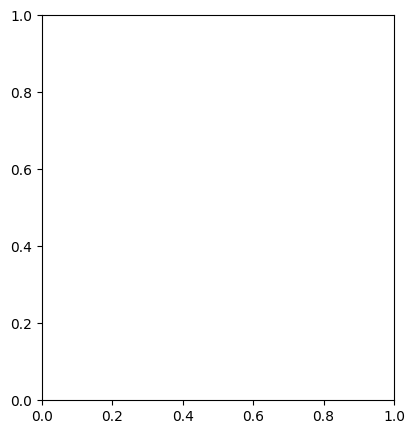

In [7]:
# Simple scatter plot for DBSCAN
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df['Longitude'], df['Latitude'], c=df['DBSCAN_Cluster'], cmap='tab10', s=20)
plt.title('DBSCAN Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


KeyError: 'HDBSCAN_Cluster'

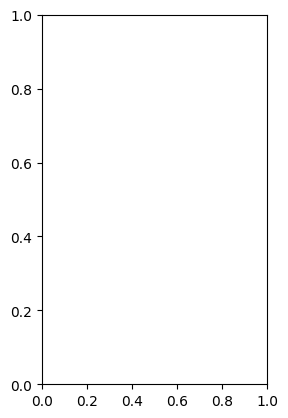

In [8]:
# Simple scatter plot for HDBSCAN
plt.subplot(1, 2, 2)
plt.scatter(df['Longitude'], df['Latitude'], c=df['HDBSCAN_Cluster'], cmap='tab10', s=20)
plt.title('HDBSCAN Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()